In [1]:
%autosave 30
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

Autosaving every 30 seconds


<b/> Data preparation

In [2]:
#read in csv

df = pd.read_csv("LonM2016.csv", encoding = 'latin1')

#remove duplicates
df.drop_duplicates()

#remove repeated instances of header
df = df[df.Category != "Category"]

#drop uneccessary columns
df.drop(df.columns[[0,5]], axis=1, inplace=True)

# tidy up columns by removing first and last character
df['Name'] = df['Name'].map(lambda x: str(x)[:-1])
df['Name'] = df['Name'].map(lambda x: str(x)[1:])

# convert to necessary formats
df['Finish'] = pd.to_timedelta(df['Finish'])
df['Half'] = pd.to_timedelta(df['Half'])

df['Place Category'] = pd.to_numeric(df['Place Category'], errors='coerce')
df['Place Gender'] = pd.to_numeric(df['Place Gender'], errors='coerce')
df['Place Overall'] = pd.to_numeric(df['Place Overall'], errors='coerce')


# Find duration of second half
df['Diff'] = df['Finish'] - df['Half']


#find difference between first and second halfs
df['Diff2'] = abs((df['Diff'] - df['Half']))


# rename columns
df.rename(columns = {'Half':'First Half', 'Diff':'Second Half', 'Diff2':'Difference'}, inplace = True)

# reorder columns
df = df[['First Half', 'Second Half', 'Difference', 'Finish', 'Category', 'Place Overall', 'Place Category', 'Place Gender', 'Name', 'Club', 'Runner No']]

#create a new column with a default value
df['Splits'] = np.nan

# add values based on first and second half times
df.loc[df['First Half'] > df['Second Half'], 'Splits'] = 'Positive'
df.loc[df['First Half'] < df['Second Half'], 'Splits'] = 'Negative'

# convert time columns to seconds only so we can calculate averages
df['1st seconds'] = df['First Half'] / np.timedelta64(1, 's')
df['2nd seconds'] = df['Second Half'] / np.timedelta64(1, 's')
df['Finish seconds'] = df['Finish'] / np.timedelta64(1, 's')
df['Diff seconds'] = df['Difference'] / np.timedelta64(1, 's')



#create copies to create graphs from

# Finishers copy
Finishers = df[['Category', '1st seconds', '2nd seconds', 'Finish seconds', 'Diff seconds', 'Splits']]
Finishers.dropna(axis=0, how='any')

,Category,1st seconds,2nd seconds,Finish seconds,Diff seconds,Splits
0,18-39,6479.0,7199.0,13678.0,720.0,Negative
1,18-39,6383.0,7646.0,14029.0,1263.0,Negative
2,45-49,7835.0,10725.0,18560.0,2890.0,Negative
3,18-39,7705.0,8143.0,15848.0,438.0,Negative
5,50-54,5830.0,6505.0,12335.0,675.0,Negative
6,40-44,7117.0,7403.0,14520.0,286.0,Negative
7,50-54,6296.0,6223.0,12519.0,73.0,Positive
8,18-39,5626.0,5761.0,11387.0,135.0,Negative
9,45-49,8466.0,11029.0,19495.0,2563.0,Negative
10,18-39,5922.0,6784.0,12706.0,862.0,Negative


In [3]:
df.count()

First Half        24840
Second Half       24715
Difference        24715
Finish            24754
Category          28633
Place Overall     24754
Place Category    24753
Place Gender      24753
Name              28634
Club               7088
Runner No         28634
Splits            24702
1st seconds       24840
2nd seconds       24715
Finish seconds    24754
Diff seconds      24715
dtype: int64

In [4]:
pd.pivot_table(Finishers,index=["Category","Splits"],values=["Finish seconds", "1st seconds", "2nd seconds"],aggfunc=[np.mean])

mean                             
                   1st seconds   2nd seconds Finish seconds
Category Splits                                            
18-39    Negative  7057.090033   8239.221843   15296.311876
         Positive  6628.149132   6471.314607   13099.463739
40-44    Negative  6951.636990   7952.510821   14904.147811
         Positive  6553.828729   6418.599448   12972.428177
45-49    Negative  7018.666352   7994.809254   15013.475606
         Positive  6771.093117   6635.522267   13406.615385
50-54    Negative  7162.103341   8173.212918   15335.316258
         Positive  6829.876543   6703.475309   13533.351852
55-59    Negative  7405.315488   8557.212237   15962.527725
         Positive  6946.360656   6804.245902   13750.606557
60-64    Negative  7712.622351   8929.520231   16642.142582
         Positive  6880.571429   6790.214286   13670.785714
65-69    Negative  7861.316456   9034.172996   16895.489451
         Positive  7666.153846   7462.153846   15128.307692
70+      Negative  8634.476821  10182.357616   18816.834437
         Positive  9235.000000   8758.000000   17993.000000

In [90]:
pd.pivot_table(Finishers,index=["Category"],values=["Finish seconds", "Diff seconds"],aggfunc=[np.mean])



mean               
         Diff seconds Finish seconds
Category                            
18-39     1100.719400   15128.993959
40-44      929.685327   14760.186880
45-49      914.971395   14907.209147
50-54      950.380913   15223.144633
55-59     1096.253839   15847.756757
60-64     1185.084270   16589.914179
65-69     1122.476000   16894.448413
70+       1513.557692   18892.310127

In [48]:
Finishers['COUNTER'] =1       #initially, set that counter to 1.
group_data = Finishers.groupby(['Category','Splits'])['COUNTER'].sum() #sum function
print(group_data)

Category  Splits  
18-39     Negative    11418
          Positive      979
40-44     Negative     4066
          Positive      362
45-49     Negative     3177
          Positive      247
50-54     Negative     2245
          Positive      162
55-59     Negative     1046
          Positive       61
60-64     Negative      519
          Positive       14
65-69     Negative      237
          Positive       13
70+       Negative      151
          Positive        5
Name: COUNTER, dtype: int64


C:\Users\Amber Gibney\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
# expressing groupby as percentages
group_data.groupby(level=[0]).apply(lambda x: x / x.sum())

Category  Splits  
18-39     Negative    0.921029
          Positive    0.078971
40-44     Negative    0.918248
          Positive    0.081752
45-49     Negative    0.927862
          Positive    0.072138
50-54     Negative    0.932696
          Positive    0.067304
55-59     Negative    0.944896
          Positive    0.055104
60-64     Negative    0.973734
          Positive    0.026266
65-69     Negative    0.948000
          Positive    0.052000
70+       Negative    0.967949
          Positive    0.032051
Name: COUNTER, dtype: float64

<b/> If we need to see unique values in a column

In [192]:
df['Place Gender'].unique()

array([  8351.,   9451.,  20452., ...,   6749.,  22494.,  17288.])

<b/> Let's explore our data. First let's count how many are in each age group

In [18]:
AgeGroup = (df.groupby(['Category', 'Splits']).agg({'Name': 'count'})
          .sort_values(by='Name', ascending=False))[:10].reset_index()

AgeGroup

,Category,Splits,Name
0,18-39,Negative,11418
1,40-44,Negative,4066
2,45-49,Negative,3177
3,50-54,Negative,2245
4,18-39,NaN,2092
5,55-59,Negative,1046
6,18-39,Positive,979
7,40-44,NaN,640
8,60-64,Negative,519
9,45-49,NaN,516


In [19]:
ClubGroup = (df.groupby('Club').agg({'Name': 'count'})
          .sort_values(by='Name', ascending=False))[:10].reset_index()

ClubGroup

,Club,Name
0,None,136
1,Serpenti...,51
2,Clapham ...,48
3,none,48
4,Cambridge...,41
5,Victoria P...,38
6,Reading ...,33
7,South Lo...,29
8,Serpentine,29
9,Wimbledon ...,29


<b/> If you need to filter

In [49]:
Finishers[Finishers["Splits"]=="NaN"].head()

,Category,1st seconds,2nd seconds,Finish seconds,Diff seconds,Splits,COUNTER


In [28]:
df.head(2)

,First Half,Second Half,Difference,Finish,Category,Place Overall,Place Category,Place Gender,Name,Club,Runner No,Splits,1st seconds,2nd seconds,Finish seconds,Diff seconds
0,01:47:59,01:59:59,00:12:00,03:47:58,18-39,10490.0,4116.0,8351.0,"17, Juan Cascales (GBR)",NaN,6088,Negative,6479.0,7199.0,13678.0,720.0
1,01:46:23,02:07:26,00:21:03,03:53:49,18-39,12114.0,4674.0,9451.0,"A'Court, Oliver (GBR)",NaN,5713,Negative,6383.0,7646.0,14029.0,1263.0


<b/> Playing with graphs in Seaborn

(0, 14494.227127918166)

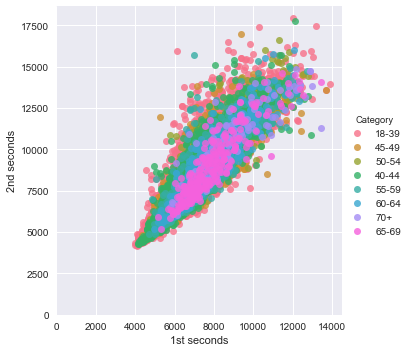

In [50]:
# no regression line (it is automatic otherwise as there is no scatterplot function)
# colour based on age category

sns.lmplot(x='1st seconds', y='2nd seconds', data=Finishers, fit_reg=False, hue='Category')

# we need to use matplotlib functions to set the axes boundaries
plt.ylim(0, None)
plt.xlim(0, None)

(0, 33140.900000000001)

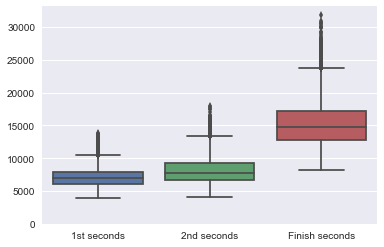

In [52]:
# Pre-format a new DataFrame
stats_df = Finishers[['1st seconds', '2nd seconds', 'Finish seconds']]
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

# we need to use matplotlib functions to set the axes boundaries
plt.ylim(0, None)


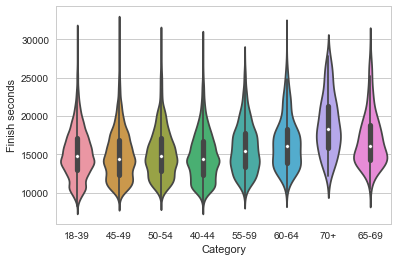

In [42]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Category', y='Finish seconds', data=df)

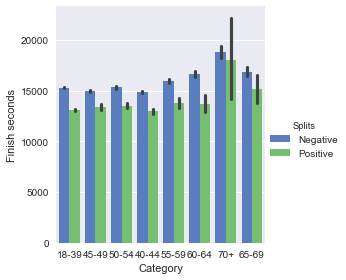

In [54]:
# Set up a factorplot
g = sns.factorplot("Category", "Finish seconds", "Splits", data=Finishers, kind="bar", palette="muted", legend=True)
                   
# Show plot
plt.show()

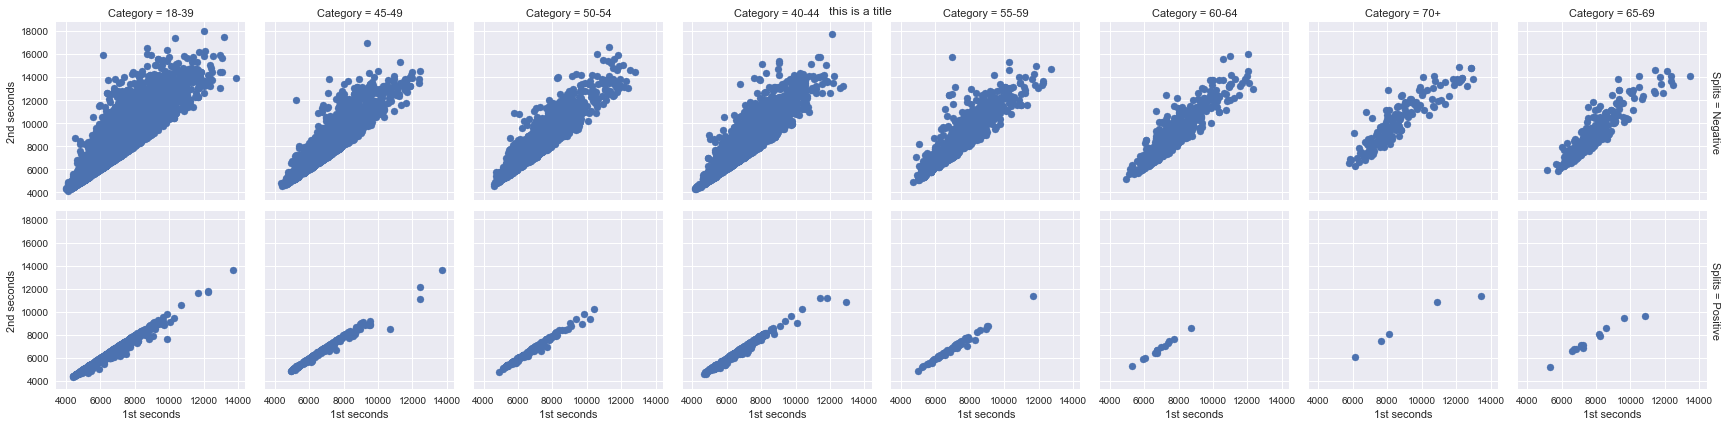

In [55]:
g = sns.FacetGrid(Finishers, col="Category", row="Splits", margin_titles=True)
g.map(sns.plt.scatter, "1st seconds", "2nd seconds")

# Add a title to the figure
g.fig.suptitle("this is a title")

# Show the plot
plt.show()

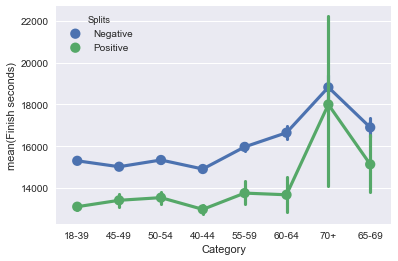

In [59]:
sns.pointplot(x="Category", y="Finish seconds", hue="Splits", data=Finishers);

<b/> Use a factorplot to specify a number of different kinds of charts

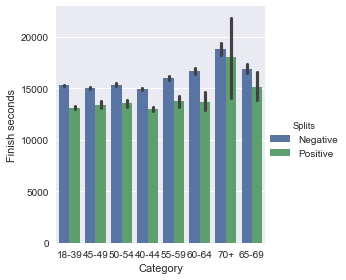

In [65]:
sns.factorplot(x="Category", y="Finish seconds", hue="Splits", data=Finishers, kind="bar");

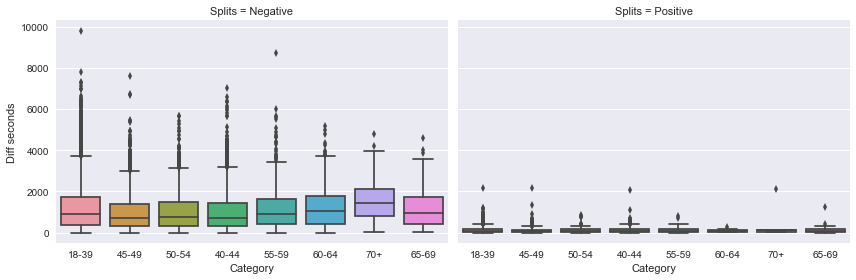

In [68]:
sns.factorplot(x="Category", y="Diff seconds",
               col="Splits", data=Finishers, kind="box", size=4, aspect=1.5);

TypeError: '<=' not supported between instances of 'str' and 'float'

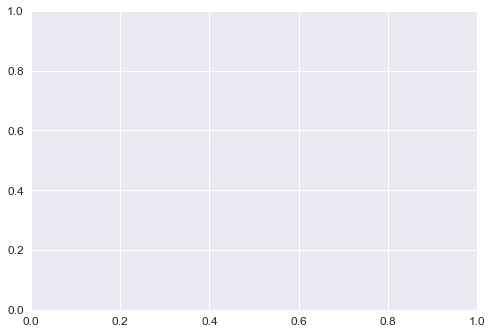